## 384 Indexing-Sample Layout 

In [1]:
import pandas as pd

### Load seq cheat sheet sample layout

In [2]:
parent_dir = '/home/douso/Documents/SarsGenomics'
df_seqcheat = (pd.read_excel(f'{parent_dir}/sequencing_cheat_sheet_seq13.xlsx', 
                sheet_name='ngul2nM', usecols=['sample name', 'plate pos'], header=1).
               dropna())

In [3]:
samp_list = list(df_seqcheat['sample name'])

In [4]:
len(samp_list)

384

In [5]:
count = 0
plates = []
plate = {'col1': [], 'col2': [], 'col3': [], 'col4': [], 'col5': [], 'col6': [],
         'col7': [], 'col8': [], 'col9': [], 'col10': [], 'col11': [], 'col12': []}
for r in range(32):
    row = samp_list[count:count+12]
    plate['col1'].append(row[0])
    plate['col2'].append(row[1])
    plate['col3'].append(row[2])
    plate['col4'].append(row[3])
    plate['col5'].append(row[4])
    plate['col6'].append(row[5])
    plate['col7'].append(row[6])
    plate['col8'].append(row[7])
    plate['col9'].append(row[8])
    plate['col10'].append(row[9])
    plate['col11'].append(row[10])
    plate['col12'].append(row[11])
    count += 12

a = 8
plt1=[]; plt2=[]; plt3=[]; plt4=[]
for n in list(plate.values()):#.astype(list)
    plt1 += n[:a]
    plt2 += n[a:a*2]
    plt3 += n[a*2:a*3]
    plt4 += n[a*3:]
all_plates = plt1 + plt2 + plt3 + plt4

In [6]:
sr_index = pd.Series(all_plates, name='indexing')
len(sr_index)

384

In [7]:
df_index = sr_index.to_frame().merge(df_seqcheat, how='inner', left_on='indexing', right_on='sample name')

In [8]:
df_index

,indexing,sample name,plate pos
0,COVC23886,COVC23886,A1
1,COVC23936,COVC23936,B1
2,COVC23669,COVC23669,C1
3,COVC23643,COVC23643,D1
4,COVC23552,COVC23552,E1
...,...,...,...
379,COVC20624,COVC20624,D12
380,COVC20783,COVC20783,E12
381,COVC21328,COVC21328,F12
382,COVC21457,COVC21457,G12


In [18]:
df_index.to_excel(f'{parent_dir}/index_cheat_sheet_seq13.xlsx', index=False)

### Cts-Genome Coverage Plots

In [9]:
home_dir = '/home/douso/SarsGenomics/Processed'
df_cov = pd.DataFrame(columns=['S_NUM', 'G_COV'])
for i in range(1, 6):
    df_cov = df_cov.append(pd.read_excel(f'{home_dir}/metadata-seq-MS00{i}.xlsx', usecols=['S_NUM', 'G_COV']))

In [10]:
df_cov

,S_NUM,G_COV
0,COVC21058,100.0
1,COVC21059,100.0
2,COVC21060,100.0
3,COVC21062,100.0
4,COVC23001,100.0
...,...,...
132,NHRL-S028,90.1
133,NHRL-S029,93.8
134,NHRL-S032,93.7
135,NHRL-S035,90.6


In [11]:
samp_names = list(df_cov['S_NUM'])

In [12]:
df_Cts = pd.read_excel('/home/douso/Documents/RunSheets/Cts/runsheet-cts.xlsx')[['Sample_Name', 'Ct_Mean']]
# df_nhrl_Cts = pd.read_excel('/home/douso/Documents/RunSheets/Cts/NHRL-cts.xlsx')
# df_Cts = df_covc_Cts.append(df_nhrl_Cts)

In [13]:
df_ct_cov = (df_Cts.merge(df_cov, how='inner', left_on='Sample_Name', 
            right_on='S_NUM').drop('S_NUM',axis=1).sort_values('Ct_Mean').dropna())#[df_Cts['Sample_Name'].isin(samp_names)]

In [14]:
df_ct_cov.to_excel('/home/douso/Documents/RunSheets/Cts/cts-cov.xlsx', index=False, float_format='%.0f')

In [15]:
import numpy as np

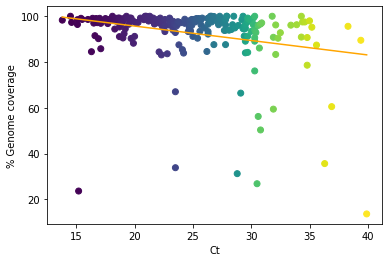

In [16]:
import matplotlib.pyplot as plt, numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(np.array(df_ct_cov['Ct_Mean']).reshape(-1, 1), df_ct_cov['G_COV'])

y_predicted = lr.predict(np.array(df_ct_cov['Ct_Mean']).reshape(-1, 1))

plt.plot(df_ct_cov['Ct_Mean'], y_predicted, color='orange')

plt.scatter(df_ct_cov['Ct_Mean'], df_ct_cov['G_COV'], c=np.logspace(0.1, 1, len(df_ct_cov['Ct_Mean'])), cmap='viridis')
plt.xlabel('Ct')
plt.ylabel('% Genome coverage')
plt.show()